# Heart Disease Prediction using Neural Networks 

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast
import plotly.express as px
from scipy import stats

## Loading data

Segments of 10 seconds was used, because most of the ECG  monitors display  and analyze such signal  duration, and Hajeb-M et al. [5] reported that 8 s segments is the best choice  for  classification  accuracy. 

100 Hz - 1000 elements in signal array - 1000/100 = 10 seconds

500 Hz - 5000 elements in signal array - 5000/500 = 10 seconds

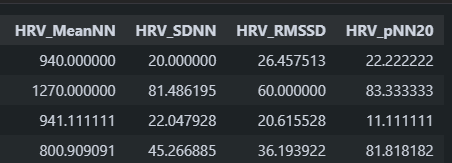

## HRV metrics

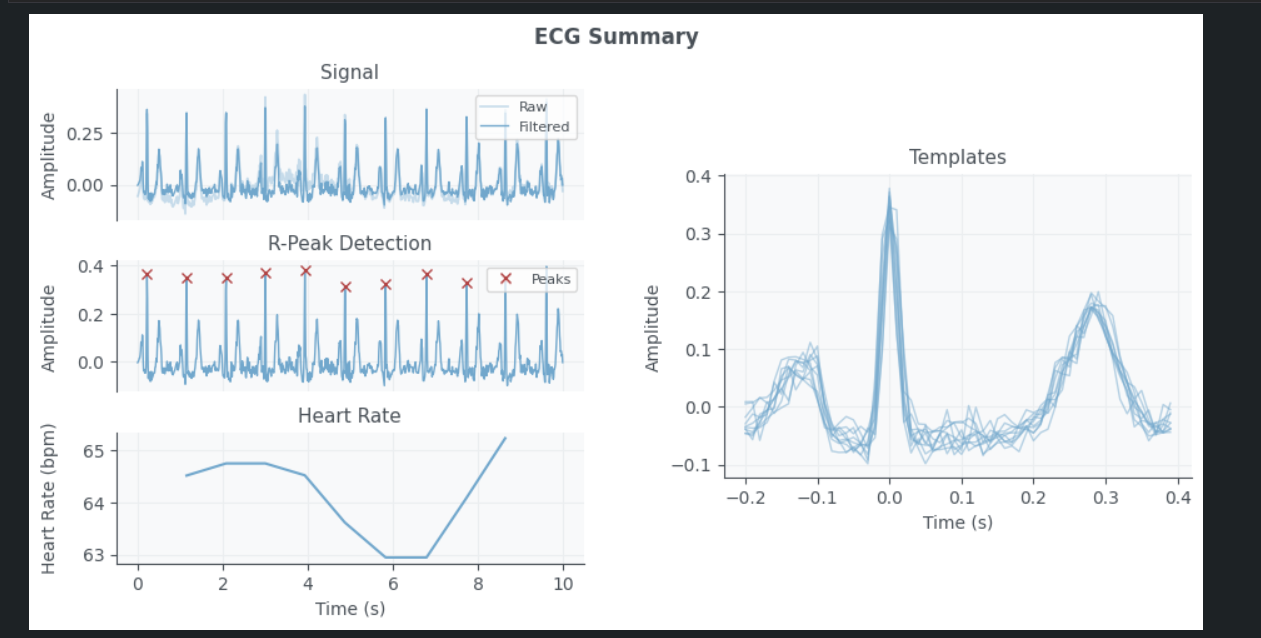

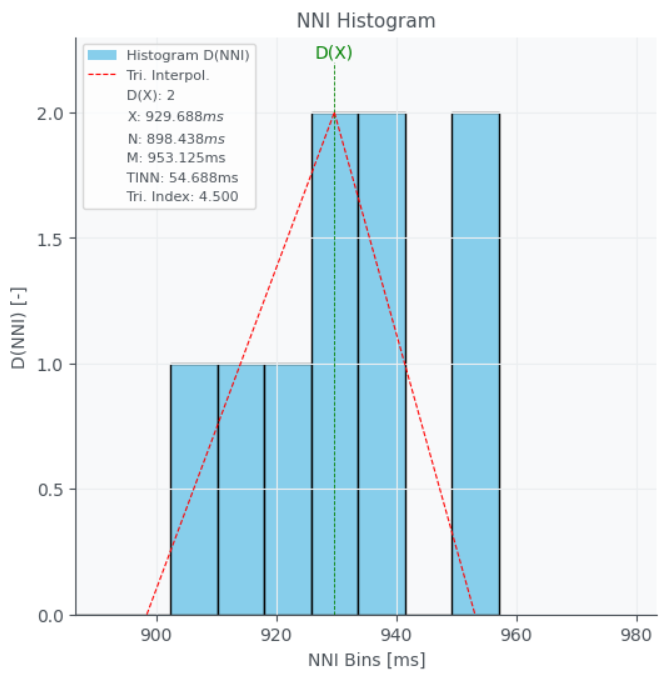

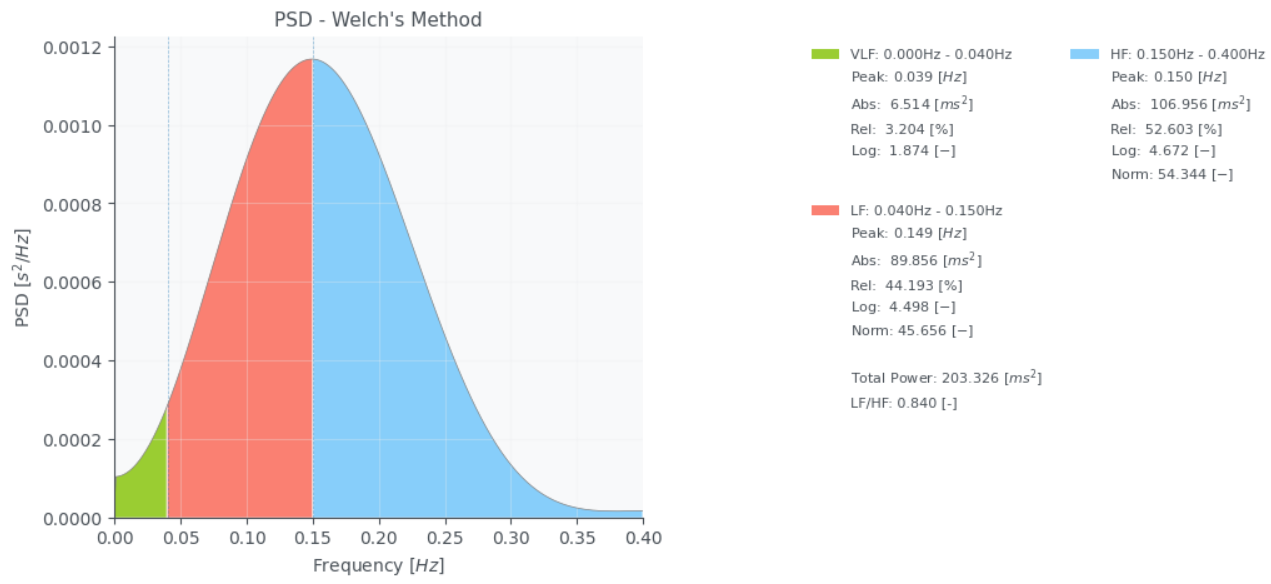

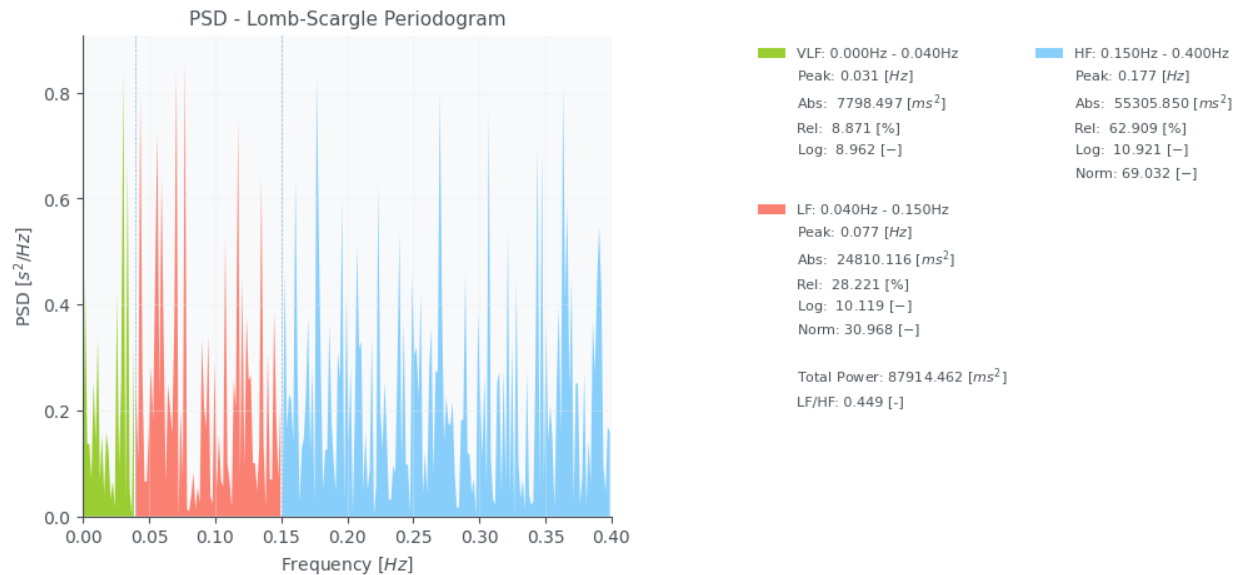

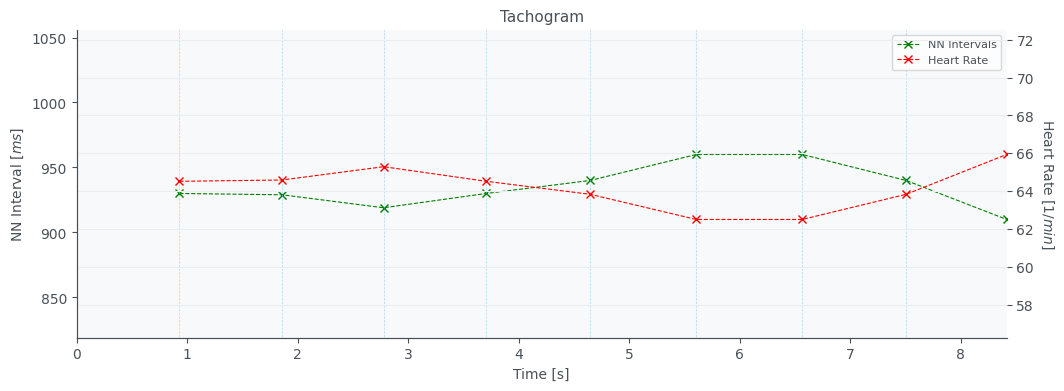

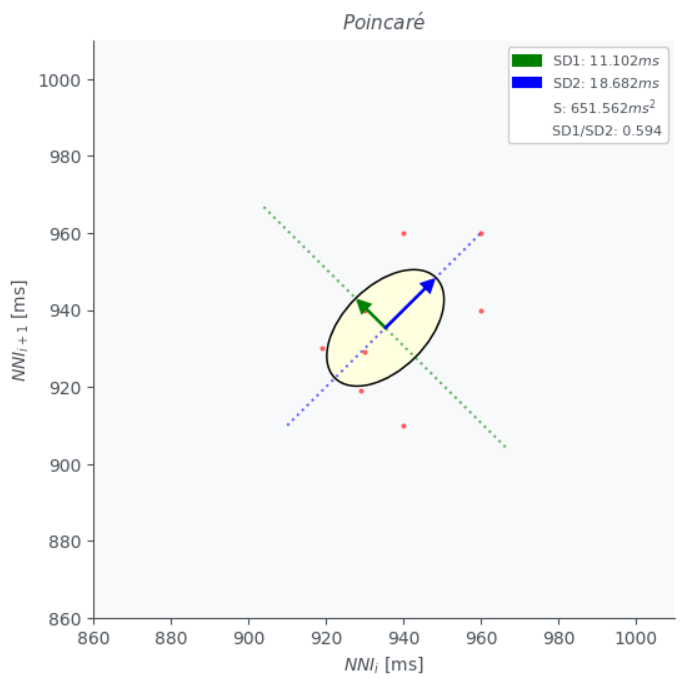

## Data Evaluation

In [3]:
sampling_rate=500
hrv_columns = ['lead1_sdnn', 'lead1_rmssd', 'lead1_fft_ratio', 'lead2_sdnn',
       'lead2_rmssd', 'lead2_fft_ratio', 'lead3_sdnn', 'lead3_rmssd',
       'lead3_fft_ratio', 'lead4_sdnn', 'lead4_rmssd', 'lead4_fft_ratio',
       'lead5_sdnn', 'lead5_rmssd', 'lead5_fft_ratio', 'lead6_sdnn',
       'lead6_rmssd', 'lead6_fft_ratio', 'lead7_sdnn', 'lead7_rmssd',
       'lead7_fft_ratio', 'lead8_sdnn', 'lead8_rmssd', 'lead8_fft_ratio',
       'lead9_sdnn', 'lead9_rmssd', 'lead9_fft_ratio', 'lead10_sdnn',
       'lead10_rmssd', 'lead10_fft_ratio', 'lead11_sdnn', 'lead11_rmssd',
       'lead11_fft_ratio', 'lead12_sdnn', 'lead12_rmssd', 'lead12_fft_ratio']

In [4]:
# print the last twenty or so data points
# Load the two CSV files
database_row = pd.read_csv("ptbxl_database_with_hrv_time_features.csv")
database_row = database_row.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], errors='ignore')
database_row = database_row.reset_index(drop=True)

print(database_row.columns)
database_row.loc[1204]

Index(['age', 'sex', 'scp_codes', 'filename_lr', 'filename_hr', 'lead1_sdnn',
       'lead1_rmssd', 'lead1_fft_ratio', 'lead2_sdnn', 'lead2_rmssd',
       'lead2_fft_ratio', 'lead3_sdnn', 'lead3_rmssd', 'lead3_fft_ratio',
       'lead4_sdnn', 'lead4_rmssd', 'lead4_fft_ratio', 'lead5_sdnn',
       'lead5_rmssd', 'lead5_fft_ratio', 'lead6_sdnn', 'lead6_rmssd',
       'lead6_fft_ratio', 'lead7_sdnn', 'lead7_rmssd', 'lead7_fft_ratio',
       'lead8_sdnn', 'lead8_rmssd', 'lead8_fft_ratio', 'lead9_sdnn',
       'lead9_rmssd', 'lead9_fft_ratio', 'lead10_sdnn', 'lead10_rmssd',
       'lead10_fft_ratio', 'lead11_sdnn', 'lead11_rmssd', 'lead11_fft_ratio',
       'lead12_sdnn', 'lead12_rmssd', 'lead12_fft_ratio'],
      dtype='object')


age                                                           78.0
sex                                                              1
scp_codes           {'INJAS': 100.0, 'ISCIL': 100.0, 'SBRAD': 0.0}
filename_lr                              records100/01000/01216_lr
filename_hr                              records500/01000/01216_hr
lead1_sdnn                                               23.591665
lead1_rmssd                                               32.41296
lead1_fft_ratio                                           0.289989
lead2_sdnn                                               24.432901
lead2_rmssd                                              33.532074
lead2_fft_ratio                                           0.297013
lead3_sdnn                                               22.604572
lead3_rmssd                                              30.397368
lead3_fft_ratio                                           0.294479
lead4_sdnn                                               26.47

In [79]:
columns = ['age', 'sex', 'scp_codes'] + hrv_columns
columns_with_no_scp_codes = ['age', 'sex'] + hrv_columns
df = database_row[columns]
df.describe()

,age,sex,lead1_sdnn,lead1_rmssd,lead1_fft_ratio,lead2_sdnn,lead2_rmssd,lead2_fft_ratio,lead3_sdnn,lead3_rmssd,...,lead9_fft_ratio,lead10_sdnn,lead10_rmssd,lead10_fft_ratio,lead11_sdnn,lead11_rmssd,lead11_fft_ratio,lead12_sdnn,lead12_rmssd,lead12_fft_ratio
count,20800.000000,20800.000000,20800.000000,20800.000000,20800.000000,20798.000000,20798.000000,20798.000000,20795.000000,20795.000000,...,20799.000000,20799.000000,20799.000000,20799.000000,20797.000000,20797.000000,20797.000000,20794.000000,20794.000000,20794.000000
mean,62.826731,0.478894,49.947611,64.417712,0.755569,49.699038,64.329653,0.747811,63.948301,85.430709,...,0.748372,48.453255,62.599317,0.755760,48.803300,63.002080,0.755758,49.209578,63.454145,0.756946
std,32.325548,0.499566,72.256942,109.426139,0.772677,70.298311,107.646962,0.769960,89.242473,131.685927,...,0.780917,68.819381,105.308312,0.773642,70.948260,108.458287,0.766280,72.123532,109.281739,0.771221
min,2.000000,0.000000,0.000000,0.000000,0.000708,0.000000,0.000000,0.000668,0.506370,0.763763,...,0.000234,0.421637,0.577350,0.000176,0.353553,0.534522,0.000467,0.000000,0.000000,0.000644
25%,50.000000,0.000000,11.581085,11.105266,0.209327,11.758925,11.270537,0.206446,14.105576,13.976915,...,0.201798,11.532398,10.944303,0.207986,11.491059,10.873397,0.208390,11.490625,10.925887,0.209990
50%,62.000000,0.000000,21.985454,21.645502,0.517333,22.284424,22.062411,0.514594,29.051678,30.523635,...,0.506797,21.991132,21.567171,0.519480,21.803160,21.390149,0.524114,21.773528,21.453438,0.517584
75%,72.000000,1.000000,51.584146,55.194202,1.049539,52.512305,56.814443,1.039753,67.644475,89.800507,...,1.044286,51.206011,55.188158,1.055047,50.801083,54.186546,1.067850,50.885069,53.735631,1.059682
max,300.000000,1.000000,1015.169542,1767.247860,11.381573,1406.199239,2485.856341,11.512414,1408.023763,2055.868308,...,11.756898,1014.240603,1765.907415,12.027767,1137.261272,1827.170901,11.647738,1136.320729,1825.733277,11.192130


### Remove outliers

In [80]:
df = df.dropna(subset=hrv_columns + ["age", "sex"], how="any")
df.count()

age                 20786
sex                 20786
scp_codes           20786
lead1_sdnn          20786
lead1_rmssd         20786
lead1_fft_ratio     20786
lead2_sdnn          20786
lead2_rmssd         20786
lead2_fft_ratio     20786
lead3_sdnn          20786
lead3_rmssd         20786
lead3_fft_ratio     20786
lead4_sdnn          20786
lead4_rmssd         20786
lead4_fft_ratio     20786
lead5_sdnn          20786
lead5_rmssd         20786
lead5_fft_ratio     20786
lead6_sdnn          20786
lead6_rmssd         20786
lead6_fft_ratio     20786
lead7_sdnn          20786
lead7_rmssd         20786
lead7_fft_ratio     20786
lead8_sdnn          20786
lead8_rmssd         20786
lead8_fft_ratio     20786
lead9_sdnn          20786
lead9_rmssd         20786
lead9_fft_ratio     20786
lead10_sdnn         20786
lead10_rmssd        20786
lead10_fft_ratio    20786
lead11_sdnn         20786
lead11_rmssd        20786
lead11_fft_ratio    20786
lead12_sdnn         20786
lead12_rmssd        20786
lead12_fft_r

In [83]:
columns_to_check = hrv_columns

In [84]:
df = df[(df[columns_to_check] < 100).all(axis=1)]
df.describe()

,age,sex,lead1_sdnn,lead1_rmssd,lead1_fft_ratio,lead2_sdnn,lead2_rmssd,lead2_fft_ratio,lead3_sdnn,lead3_rmssd,...,lead9_fft_ratio,lead10_sdnn,lead10_rmssd,lead10_fft_ratio,lead11_sdnn,lead11_rmssd,lead11_fft_ratio,lead12_sdnn,lead12_rmssd,lead12_fft_ratio
count,12157.000000,12157.000000,12157.000000,12157.000000,12157.000000,12157.000000,12157.000000,12157.000000,12157.000000,12157.000000,...,12157.000000,12157.000000,12157.000000,12157.000000,12157.000000,12157.000000,12157.000000,12157.000000,12157.000000,12157.000000
mean,58.615777,0.466398,22.034852,22.000601,0.806324,22.219231,22.297648,0.799992,24.889646,27.081408,...,0.803787,22.086528,22.068098,0.812837,22.004912,21.910825,0.814001,21.976541,21.865924,0.813620
std,25.116704,0.498890,16.548179,17.474744,0.744789,16.578491,17.669031,0.742860,17.432218,21.212695,...,0.762726,16.597326,17.655576,0.757494,16.579231,17.519541,0.755666,16.511187,17.376727,0.758868
min,3.000000,0.000000,0.421637,0.577350,0.001694,0.000000,0.000000,0.000726,0.886405,1.366260,...,0.001535,0.421637,0.577350,0.001399,0.834523,1.125463,0.000947,0.707107,0.866025,0.000999
25%,47.000000,0.000000,10.087121,9.582180,0.258224,10.246409,9.721111,0.252062,11.542563,11.327299,...,0.250620,10.113640,9.548124,0.258957,10.050696,9.469248,0.259977,10.099505,9.533566,0.260295
50%,59.000000,0.000000,17.329807,16.631296,0.601407,17.528209,16.832508,0.596436,20.097037,20.396078,...,0.593893,17.384424,16.616591,0.604245,17.345159,16.478943,0.611192,17.326693,16.561181,0.606690
75%,69.000000,1.000000,29.210443,28.970428,1.133750,29.505367,29.410882,1.121874,34.753257,36.582783,...,1.126360,29.453996,29.106700,1.140291,29.217367,28.938358,1.145798,29.089595,28.939592,1.142073
max,300.000000,1.000000,99.897503,99.722741,9.110778,99.561037,99.387290,10.397019,99.646542,99.981109,...,11.756898,99.933811,99.447362,12.027767,99.695592,98.170770,10.466323,99.380805,98.554553,10.951246


In [85]:
for col in ['age'] + hrv_columns:

    q_low = df[col].quantile(0.01)
    q_hi  = df[col].quantile(0.99)

    df_filtered = df[(df[col] < q_hi) & (df[col] > q_low)]

df = df_filtered.copy()
df = df[df['age'] <= 89]

# df = df[(df['HRV_SDNN'] != 0) & (df['HRV_RMSSD'] != 0) & (df['HRV_pNN20'] != 0)]
df.describe()

,age,sex,lead1_sdnn,lead1_rmssd,lead1_fft_ratio,lead2_sdnn,lead2_rmssd,lead2_fft_ratio,lead3_sdnn,lead3_rmssd,...,lead9_fft_ratio,lead10_sdnn,lead10_rmssd,lead10_fft_ratio,lead11_sdnn,lead11_rmssd,lead11_fft_ratio,lead12_sdnn,lead12_rmssd,lead12_fft_ratio
count,11839.000000,11839.000000,11839.000000,11839.000000,11839.000000,11839.000000,11839.000000,11839.000000,11839.000000,11839.000000,...,11839.000000,11839.000000,11839.000000,11839.000000,11839.000000,11839.000000,11839.000000,11839.000000,11839.000000,11839.000000
mean,57.031253,0.463891,22.131138,22.099857,0.785274,22.316309,22.401724,0.778729,24.988987,27.192689,...,0.781735,22.181551,22.165423,0.790655,22.100669,22.008364,0.790531,22.078404,21.977458,0.787333
std,16.467020,0.498715,16.539678,17.450417,0.675549,16.574195,17.654925,0.669666,17.434521,21.216029,...,0.683406,16.589432,17.627452,0.678425,16.565144,17.476374,0.674728,16.502894,17.359144,0.667083
min,3.000000,0.000000,0.421637,0.577350,0.003121,0.000000,0.000000,0.005139,0.886405,1.366260,...,0.002920,0.421637,0.577350,0.006152,0.834523,1.125463,0.003891,0.707107,0.866025,0.017444
25%,47.000000,0.000000,10.238599,9.726253,0.265263,10.366978,9.835580,0.261221,11.648796,11.471968,...,0.258526,10.207299,9.661996,0.266307,10.178175,9.609024,0.267292,10.201443,9.664234,0.267168
50%,59.000000,0.000000,17.476004,16.763055,0.603674,17.621010,16.963195,0.598481,20.186904,20.489021,...,0.595481,17.474108,16.723237,0.606635,17.455556,16.613248,0.612135,17.434003,16.680827,0.608385
75%,69.000000,1.000000,29.321571,29.107201,1.122135,29.632676,29.535803,1.107425,34.839390,36.729354,...,1.116974,29.581014,29.254425,1.126196,29.318635,29.021065,1.131550,29.250688,29.107559,1.124457
max,89.000000,1.000000,99.897503,99.722741,6.013854,99.561037,99.387290,6.173216,99.646542,99.981109,...,8.014349,99.933811,99.447362,5.699566,99.695592,98.170770,6.109714,99.380805,98.554553,3.316354


## SCP codes expansion for future visualization

In [86]:
# Expand the scp_codes into separate rows for each condition
expanded_rows = []

for _, row in df.iterrows():
    for condition, value in ast.literal_eval(row['scp_codes']).items():
        if value > 0:  # Include only non-zero conditions
            new_row = row.to_dict()  # Convert the row to a dictionary
            new_row['Class'] = condition  # Set the class to the condition name
            new_row['Confidence'] = value  # Set the confidence level
            expanded_rows.append(new_row)  # Append the new row

# Create a new DataFrame with the expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Drop the original 'scp_codes' column as it's no longer needed
expanded_df = expanded_df.drop(columns=['scp_codes'])

expanded_df = expanded_df[expanded_df["Confidence"] == 100]
expanded_df.tail()

,age,sex,lead1_sdnn,lead1_rmssd,lead1_fft_ratio,lead2_sdnn,lead2_rmssd,lead2_fft_ratio,lead3_sdnn,lead3_rmssd,...,lead10_rmssd,lead10_fft_ratio,lead11_sdnn,lead11_rmssd,lead11_fft_ratio,lead12_sdnn,lead12_rmssd,lead12_fft_ratio,Class,Confidence
15877,53.0,1,6.872465,7.538789,1.451953,7.364154,8.113774,1.073997,7.346724,9.656604,...,7.615773,1.521882,7.197756,8.281505,1.074530,7.262478,8.793937,1.002014,IRBBB,100.0
15878,55.0,1,24.497449,21.088250,1.263492,24.446735,21.206468,1.006485,24.368818,21.250210,...,20.618993,1.037463,24.270794,20.938686,1.105648,24.357090,21.219937,1.107871,NORM,100.0
15879,59.0,0,61.051527,34.297716,1.470185,61.064993,33.916564,1.478641,60.889335,33.693059,...,34.078341,1.498668,60.644776,33.936215,1.470073,60.809447,34.057142,1.453519,NORM,100.0
15881,69.0,1,15.287068,15.988277,0.486287,15.278889,16.174826,0.473470,26.013351,37.633097,...,15.751984,0.486320,15.267977,16.035118,0.481672,14.903393,15.495967,0.497611,IRBBB,100.0
15882,55.0,1,15.218073,15.798207,0.057386,15.814226,16.532796,0.059969,14.885891,15.190458,...,15.900734,0.057256,15.655342,16.713268,0.052475,15.255516,15.753307,0.056938,NORM,100.0


In [87]:
expanded_df = expanded_df[expanded_df["Class"] != "NDT"] # drop non-diagnostic class

# # Test
expanded_df = expanded_df[(expanded_df["Class"] == "NORM") | (expanded_df["Class"] == "LAFB")]

expanded_df["Class"].value_counts()
NORM_count = expanded_df['Class'].value_counts().get('NORM', 0)
LAFB_count = expanded_df['Class'].value_counts().get('LAFB', 0)
total_count = expanded_df["Class"].count()
print(f"NORM: {NORM_count}, LAFB: {LAFB_count}, TOTAL: {total_count}")

NORM: 4862, LAFB: 849, TOTAL: 5711


In [98]:
# Define the key heart disease classes to focus on
key_classes = ['LAFB', 'NORM']  # ISC_ IRBBB, ABQRS, ISCAL, ANEUR

# Filter the expanded DataFrame to keep only the selected classes
filtered_df = expanded_df[expanded_df['Class'].isin(key_classes)]

# Separate out the "NORM" class for comparison
norm_df = filtered_df[filtered_df['Class'] == 'NORM']

# Loop through each selected class and compare it to "NORM"
for current_class in key_classes:
    if current_class == 'NORM':  # Skip "NORM" itself
        continue
    
    # Filter for the current class to compare with "NORM"
    class_df = filtered_df[filtered_df['Class'] == current_class]
    
    # Combine norm_df and class_df for plotting
    compare_df = pd.concat([norm_df, class_df])
    
    # Generate scatter plots for chosen feature pairs
    for x_axis_data, y_axis_data in [('age', 'sex'), ('lead2_sdnn', 'lead2_fft_ratio')]: # hr_mean	sdnn	rmssd	pnn20	fft_ratio	sd_ratio
        title = f"Comparison of '{current_class}' vs 'NORM' ({x_axis_data} vs {y_axis_data})"
        fig = px.scatter(
            compare_df, x=x_axis_data, y=y_axis_data, color='Class',
            title=title
        )
        fig.show()


In [99]:
#@title Plot three features in 3D by entering their names and running this cell

# hr_mean	sdnn	rmssd	pnn20	fft_ratio	sd_ratio

x_axis_data = 'age'  # @param {type: "string"}
y_axis_data = 'lead2_sdnn'  # @param {type: "string"}
z_axis_data = 'lead2_fft_ratio'  # @param {type: "string"}

class_df = expanded_df[(expanded_df['Class'] == "NORM") | (expanded_df["Class"] == "LAFB")]

px.scatter_3d(
    class_df,
    x=x_axis_data,
    y=y_axis_data,
    z=z_axis_data,
    color='Class',
).show()

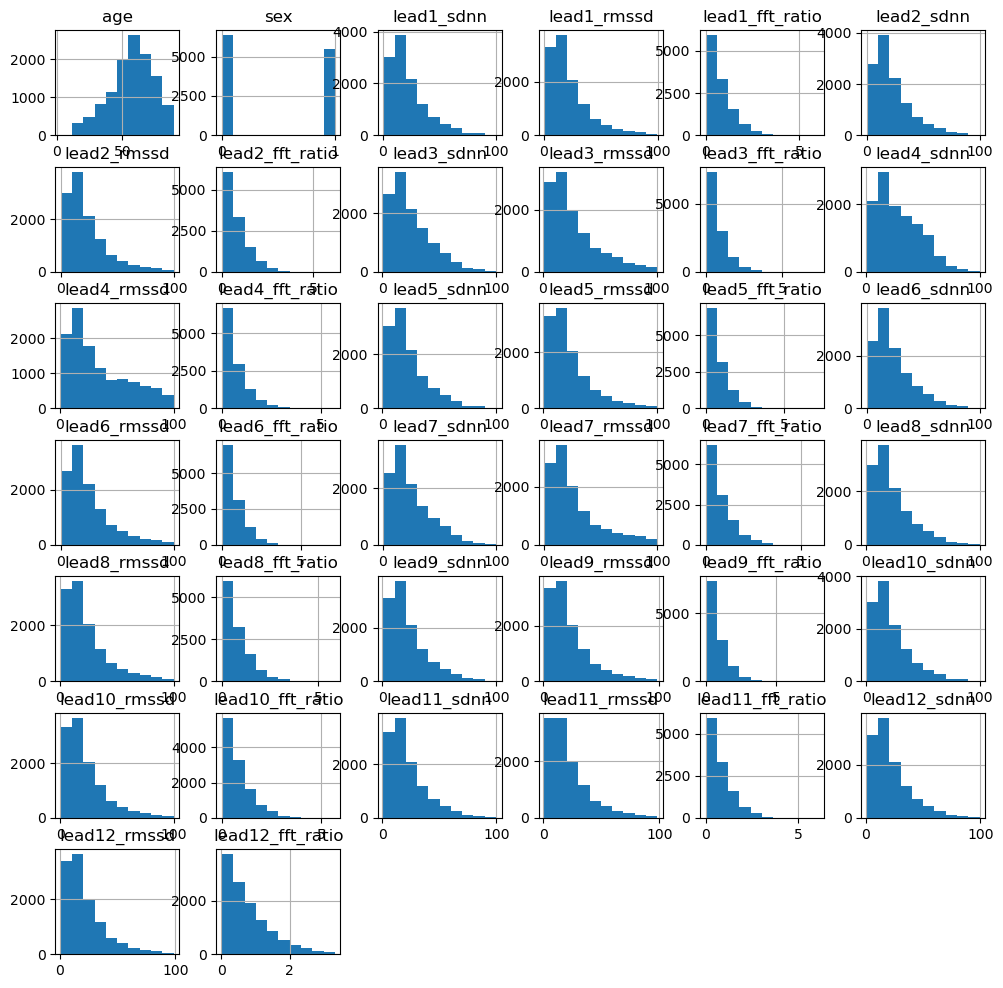

In [100]:
# plot histograms for each variable
df.hist(figsize = (12, 12))
plt.show()

### Data normalization

In [101]:
from tensorflow import keras

keras.utils.set_random_seed(42)

In [102]:
# Calculate the Z-scores of each numerical column in the raw data and write
# them into a new DataFrame named df_norm.

columns = ["age"] + hrv_columns

feature_mean = expanded_df[columns].mean()
feature_std = expanded_df[columns].std()
numerical_features = expanded_df.select_dtypes('number').columns.drop(['sex', 'Confidence'])
normalized_dataset = (
    expanded_df[numerical_features] - feature_mean
) / feature_std

# Copy the class to the new dataframe
normalized_dataset['Class'] = expanded_df['Class']

# Examine some of the values of the normalized training set. Notice that most
# Z-scores fall between -2 and +2.
normalized_dataset["sex"] = expanded_df["sex"]
normalized_dataset

,age,lead1_sdnn,lead1_rmssd,lead1_fft_ratio,lead2_sdnn,lead2_rmssd,lead2_fft_ratio,lead3_sdnn,lead3_rmssd,lead3_fft_ratio,...,lead10_rmssd,lead10_fft_ratio,lead11_sdnn,lead11_rmssd,lead11_fft_ratio,lead12_sdnn,lead12_rmssd,lead12_fft_ratio,Class,sex
1,-0.927100,-0.257622,-0.429374,-0.053755,-0.268403,-0.432475,-0.082343,0.838245,1.509645,-0.068146,...,-0.448615,-0.002095,-0.239908,-0.445972,-0.000212,-0.267025,-0.455701,-0.013408,NORM,1
2,-1.680724,0.834745,0.754471,-0.487406,0.810527,0.711733,-0.478246,0.665707,0.432043,-0.435656,...,0.721925,-0.504304,0.807350,0.702465,-0.485244,0.831892,0.753401,-0.494508,NORM,0
3,-2.028550,0.706191,0.402099,-0.278268,0.704565,0.363475,-0.270947,0.614443,0.193631,-0.241373,...,0.386986,-0.318139,0.733282,0.406351,-0.300772,0.757283,0.443860,-0.313747,NORM,1
4,0.116379,0.775456,0.017487,0.961784,0.740361,-0.013192,0.748696,0.626449,-0.206768,0.968322,...,-0.012265,0.854574,0.788348,0.016286,1.036354,0.757443,0.025290,0.877515,NORM,0
5,0.290292,-0.690255,-1.077399,1.554021,-0.708247,-1.073833,1.808107,-0.806302,-1.137726,1.647056,...,-1.015588,0.870903,-0.688210,-1.069605,1.531662,-0.692341,-1.056339,1.643506,NORM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15872,1.797539,-0.857783,-0.584151,-0.723958,-0.883408,-0.645218,-0.653023,0.573408,1.730120,-1.040256,...,-0.626698,-0.681410,-0.886330,-0.661774,-0.621900,-0.864192,-0.614377,-0.659299,NORM,1
15874,0.058408,-1.256411,-1.146543,-0.554723,-1.276029,-1.135429,-0.602355,-1.393660,-1.240732,-0.443257,...,-1.132151,-0.545664,-1.268642,-1.146439,-0.539547,-1.252816,-1.118284,-0.157051,LAFB,0
15878,0.116379,0.004300,-0.170783,0.744176,-0.009364,-0.178887,0.361492,-0.131559,-0.338376,0.762586,...,-0.197832,0.392625,-0.007796,-0.175680,0.501249,-0.003169,-0.160842,0.511845,NORM,1
15879,0.348263,2.192072,0.580508,1.061052,2.178995,0.536263,1.089787,1.995701,0.278562,1.263329,...,0.562338,1.101936,2.169241,0.562374,1.063824,2.179233,0.568109,1.048827,NORM,0


In [85]:
# Create a column setting the Norm label to '1' and the Osmancik label to '0'
# then show 10 randomly selected rows.
normalized_dataset['Class_Bool'] = (
    # Returns true if class is Norm, and false if other heart desease
    normalized_dataset['Class'] == 'NORM'
).astype(int)
normalized_dataset.sample(10)

,age,lead1_sdnn,lead1_rmssd,lead1_fft_ratio,lead2_sdnn,lead2_rmssd,lead2_fft_ratio,lead3_sdnn,lead3_rmssd,lead3_fft_ratio,...,lead10_fft_ratio,lead11_sdnn,lead11_rmssd,lead11_fft_ratio,lead12_sdnn,lead12_rmssd,lead12_fft_ratio,Class,sex,Class_Bool
6058,1.448224,-0.636892,-0.465330,-0.960617,-0.638080,-0.463751,-1.002510,-0.574202,-0.483332,-0.910879,...,-0.977702,-0.622615,-0.444786,-1.005135,-0.616800,-0.437847,-1.012366,NORM,1,1
13855,-1.435399,1.339102,1.044554,-0.462531,1.355546,1.063939,-0.468925,0.559853,0.388538,-0.395762,...,-0.486179,1.373323,1.073820,-0.483205,1.379523,1.095323,-0.483495,NORM,1,1
16145,0.543558,2.214311,2.993798,-0.954660,0.686593,1.167123,-0.920718,4.741708,5.053249,-0.322906,...,-0.407357,1.674036,2.347670,-0.975992,1.705853,2.414503,-0.977644,LAFB,1,0
22802,0.147767,-0.511164,-0.428049,-0.417303,-0.520825,-0.442244,-0.464040,-0.508755,-0.470662,-0.286461,...,-0.337110,-0.501625,-0.412680,-0.424394,-0.506098,-0.424909,-0.367121,LAFB,0,0
3622,0.713183,-0.006229,0.234527,-0.862191,-0.006549,0.224113,-0.887080,-0.216176,-0.093537,-0.798494,...,-0.891241,-0.007889,0.227365,-0.874037,0.020135,0.267253,-0.889974,NORM,1,1
19628,0.600100,-0.657538,-0.559312,2.116219,-0.660468,-0.558465,0.408204,-0.132755,-0.015891,-0.427100,...,0.349140,-0.646537,-0.537759,-0.149401,-0.655358,-0.544314,0.684730,LAFB,0,0
8574,-1.378857,0.246905,-0.107695,1.083038,0.264610,-0.098676,1.042104,3.747781,2.803687,-0.906089,...,1.118922,0.270678,-0.096308,1.137129,0.268496,-0.094667,1.141241,NORM,0,1
17076,0.260850,-0.700428,-0.565153,0.040583,-0.708696,-0.566812,-0.186118,-0.618521,-0.546357,-0.113918,...,0.470081,-0.718650,-0.580385,1.570665,-0.703368,-0.558120,1.837649,LAFB,0,0
26659,0.430475,-0.449672,-0.360751,-1.006244,-0.456601,-0.366625,-1.056925,-0.471318,-0.430335,-0.952111,...,-1.016043,-0.453183,-0.360733,-1.062389,-0.454494,-0.366188,-1.043791,NORM,1,1
25405,-0.417650,1.450669,0.990304,-0.444616,1.236845,0.840468,-0.507550,-0.407863,-0.329526,-0.778277,...,-0.440911,1.393477,0.947556,-0.448165,1.300391,0.896261,-0.497438,NORM,1,1


We can then randomize and partition the dataset into train, test, and validation splits, consisting of 80%, 10%, and 10% of the dataset respectively.

In [86]:
# Create indices at the 80th and 90th percentiles
number_samples = len(normalized_dataset)
index_80th = round(number_samples * 0.8)
index_90th = index_80th + round(number_samples * 0.1)

# Randomize order and split into train, validation, and test with a .8, .1, .1 split
shuffled_dataset = normalized_dataset.sample(frac=1, random_state=100)
train_data = shuffled_dataset.iloc[0:index_80th]
validation_data = shuffled_dataset.iloc[index_80th:index_90th]
test_data = shuffled_dataset.iloc[index_90th:]

# Show the first five rows of the last split
test_data.head()

,age,lead1_sdnn,lead1_rmssd,lead1_fft_ratio,lead2_sdnn,lead2_rmssd,lead2_fft_ratio,lead3_sdnn,lead3_rmssd,lead3_fft_ratio,...,lead10_fft_ratio,lead11_sdnn,lead11_rmssd,lead11_fft_ratio,lead12_sdnn,lead12_rmssd,lead12_fft_ratio,Class,sex,Class_Bool
5500,1.222057,-0.289562,-0.312062,0.037225,-0.261698,-0.303682,0.493328,-0.358167,-0.393063,0.680815,...,0.021004,-0.265708,-0.292202,0.088193,-0.263426,-0.292092,0.092981,NORM,1,1
26258,-0.813441,-0.046249,-0.213480,0.627730,-0.034850,-0.210139,0.660285,-0.229437,-0.339540,0.721204,...,0.733400,-0.023599,-0.206928,0.688202,-0.022305,-0.196056,0.685988,NORM,0,1
25178,0.204308,-0.058597,-0.206034,3.076819,-0.043044,-0.197207,3.002161,-0.236462,-0.334871,3.012102,...,2.880569,-0.038249,-0.201246,3.102616,-0.027506,-0.176561,3.017998,NORM,1,1
7152,0.487016,4.442454,4.047835,-0.903787,4.569014,4.158387,-0.909740,2.193816,1.957863,-0.801187,...,-0.916799,4.621813,4.194035,-0.931360,4.617869,4.233976,-0.931771,LAFB,0,0
22074,-1.661565,-0.006297,0.051475,-1.088398,-0.001550,0.042413,-1.101599,-0.210896,-0.188600,-1.021225,...,-1.108689,0.009711,0.066703,-1.120364,0.020517,0.076249,-1.125800,NORM,1,1


It's important to prevent the model from getting the label as input during training, which is called label leakage. This can be done by storing features and labels as separate variables.

In [87]:
label_columns = ['Class', 'Class_Bool']

train_features = train_data.drop(columns=label_columns)
train_labels = train_data['Class_Bool'].to_numpy()
validation_features = validation_data.drop(columns=label_columns)
validation_labels = validation_data['Class_Bool'].to_numpy()
test_features = test_data.drop(columns=label_columns)
test_labels = test_data['Class_Bool'].to_numpy()

## Train and compare the models

In [88]:
# Name of the features we'll train our model on.
input_features = ["age", "sex"] + hrv_columns

### Define

In [89]:
class_weights = {
        1: total_count / NORM_count,  # Majority class weight - NORM 
        0: total_count / LAFB_count    # Minority class weight - LAFB
}

In [ ]:
# @title Define the functions that create and train a model.

import dataclasses


@dataclasses.dataclass()
class ExperimentSettings:
  """Lists the hyperparameters and input features used to train am model."""

  learning_rate: float
  number_epochs: int
  batch_size: int
  classification_threshold: float
  input_features: list[str]


@dataclasses.dataclass()
class Experiment:
  """Stores the settings used for a training run and the resulting model."""

  name: str
  settings: ExperimentSettings
  model: keras.Model
  epochs: np.ndarray
  metrics_history: keras.callbacks.History

  def get_final_metric_value(self, metric_name: str) -> float:
    """Gets the final value of the given metric for this experiment."""
    if metric_name not in self.metrics_history:
      raise ValueError(
          f'Unknown metric {metric_name}: available metrics are'
          f' {list(self.metrics_history.columns)}'
      )
    return self.metrics_history[metric_name].iloc[-1]


def create_model(
    settings: ExperimentSettings,
    metrics: list[keras.metrics.Metric],
) -> keras.Model:
    """Create and compile a simple classification model with L2 regularization."""
    model_inputs = [
        keras.Input(name=feature, shape=(1,))
        for feature in settings.input_features
    ]
    # Use a Concatenate layer to assemble the different inputs into a single tensor.
    concatenated_inputs = keras.layers.Concatenate()(model_inputs)

    # Add L2 regularization to the Dense layer
    dense = keras.layers.Dense(
        units=1,
        input_shape=(1,),
        name='dense_layer',
        activation=keras.activations.sigmoid,
        kernel_regularizer=keras.regularizers.l2(0.01),  # L2 regularization with lambda=0.01
    )
    model_output = dense(concatenated_inputs)

    # Create the Keras model
    model = keras.Model(inputs=model_inputs, outputs=model_output)

    # Compile the model
    model.compile(
        optimizer=keras.optimizers.RMSprop(settings.learning_rate),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics,
    )
    return model


def train_model(
    experiment_name: str,
    model: keras.Model,
    dataset: pd.DataFrame,
    labels: np.ndarray,
    settings: ExperimentSettings,
) -> Experiment:
  """Feed a dataset into the model in order to train it."""

  # The x parameter of keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature.
  features = {
      feature_name: np.array(dataset[feature_name])
      for feature_name in settings.input_features
  }

  history = model.fit(
      x=features,
      y=labels,
      batch_size=settings.batch_size,
      epochs=settings.number_epochs,
      class_weight=class_weights,
  )

  return Experiment(
      name=experiment_name,
      settings=settings,
      model=model,
      epochs=history.epoch,
      metrics_history=pd.DataFrame(history.history),
  )


print('Defined the create_model and train_model functions.')

Defined the create_model and train_model functions.


In [91]:
# @title Define the plotting function.
def plot_experiment_metrics(experiment: Experiment, metrics: list[str]):
  """Plot a curve of one or more metrics for different epochs."""
  plt.figure(figsize=(12, 8))

  for metric in metrics:
    plt.plot(
        experiment.epochs, experiment.metrics_history[metric], label=metric
    )

  plt.xlabel("Epoch")
  plt.ylabel("Metric value")
  plt.grid()
  plt.legend()


print("Defined the plot_curve function.")

Defined the plot_curve function.


### Train

11ms/step - accuracy: 0.8747 - auc: 0.8803 - loss: 0.8830 - precision: 0.9527 - recall: 0.9038

accuracy: 0.8633 - auc: 0.8750 - loss: 0.9970 - precision: 0.9377 - recall: 0.8961

Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7684 - auc: 0.5512 - loss: 1.4185 - precision: 0.8448 - recall: 0.8840
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8559 - auc: 0.8203 - loss: 1.0849 - precision: 0.8774 - recall: 0.9614
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8468 - auc: 0.8487 - loss: 0.9777 - precision: 0.9050 - recall: 0.9115
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8398 - auc: 0.8529 - loss: 0.9462 - precision: 0.9140 - recall: 0.8916
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8376 - auc: 0.8543 - loss: 0.9407 - precision: 0.9170 - recall: 0.8851
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8387 - auc: 0.8548 - loss: 0.9395 - precision: 0.9191 - recall: 0.8841
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8369 - auc: 0.8556 - loss: 0.9385 - precision: 0.9185 - recall: 0.8823
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc

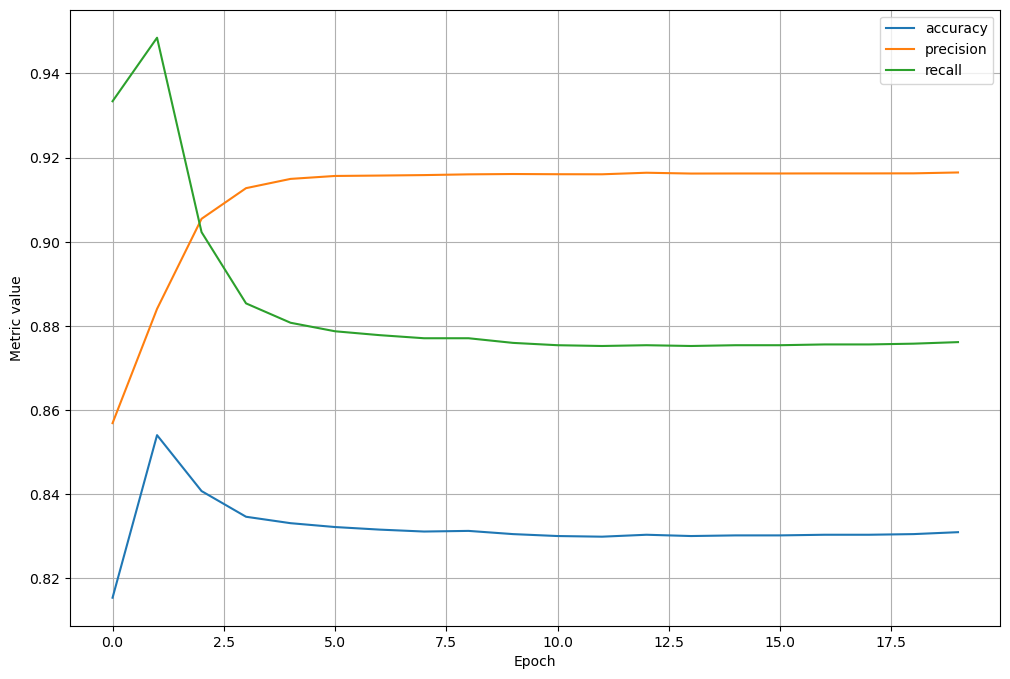

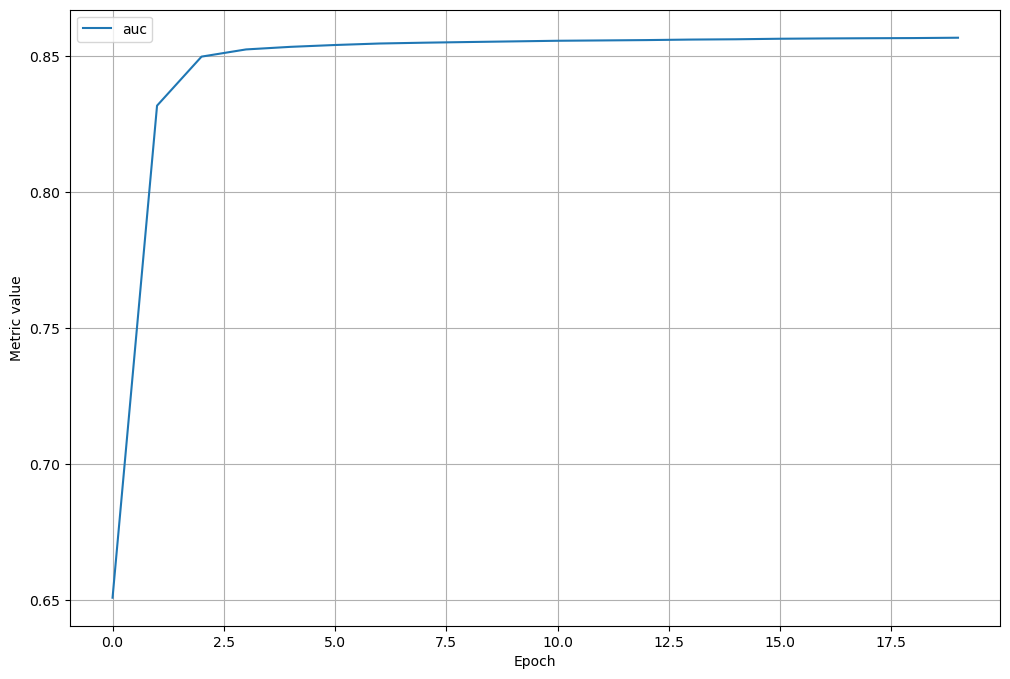

In [93]:
# Let's define our first experiment settings.
settings = ExperimentSettings(
    learning_rate=0.01,
    number_epochs=20,
    batch_size=100,
    classification_threshold=0.35,
    input_features=input_features,
)

metrics = [
    keras.metrics.BinaryAccuracy(
        name='accuracy', threshold=settings.classification_threshold
    ),
    keras.metrics.Precision(
        name='precision', thresholds=settings.classification_threshold
    ),
    keras.metrics.Recall(
        name='recall', thresholds=settings.classification_threshold
    ),
    keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establish the model's topography.
model = create_model(settings, metrics)

# Train the model on the training set.
experiment = train_model(
    'baseline', model, train_features, train_labels, settings
)

# Plot metrics vs. epochs
plot_experiment_metrics(experiment, ['accuracy', 'precision', 'recall'])
plot_experiment_metrics(experiment, ['auc'])

### Compare  

In [94]:
def evaluate_experiment(
    experiment: Experiment, test_dataset: pd.DataFrame, test_labels: np.array
) -> dict[str, float]:
  features = {
      feature_name: np.array(test_dataset[feature_name])
      for feature_name in experiment.settings.input_features
  }
  return experiment.model.evaluate(
      x=features,
      y=test_labels,
      batch_size=settings.batch_size,
      verbose=0, # Hide progress bar
      return_dict=True,
  )


def compare_train_test(experiment: Experiment, test_metrics: dict[str, float]):
  print('Comparing metrics between train and test:')
  for metric, test_value in test_metrics.items():
    print('------')
    print(f'Train {metric}: {experiment.get_final_metric_value(metric):.4f}')
    print(f'Test {metric}:  {test_value:.4f}')


# Evaluate test metrics
test_metrics = evaluate_experiment(experiment, test_features, test_labels)
compare_train_test(experiment, test_metrics)

Comparing metrics between train and test:
------
Train accuracy: 0.8310
Test accuracy:  0.8423
------
Train auc: 0.8568
Test auc:  0.8714
------
Train loss: 0.9454
Test loss:  0.4710
------
Train precision: 0.9165
Test precision:  0.9316
------
Train recall: 0.8762
Test recall:  0.8720


In [95]:
def evaluate_experiment(
    experiment: Experiment, test_dataset: pd.DataFrame, test_labels: np.array
) -> dict[str, float]:
  features = {
      feature_name: np.array(test_dataset[feature_name])
      for feature_name in experiment.settings.input_features
  }
  return experiment.model.evaluate(
      x=features,
      y=test_labels,
      batch_size=settings.batch_size,
      verbose=0, # Hide progress bar
      return_dict=True,
  )


def compare_train_test(experiment: Experiment, test_metrics: dict[str, float]):
  print('Comparing metrics between train and test:')
  for metric, test_value in test_metrics.items():
    print('------')
    print(f'Train {metric}: {experiment.get_final_metric_value(metric):.4f}')
    print(f'Test {metric}:  {test_value:.4f}')


# Evaluate test metrics
test_metrics = evaluate_experiment(experiment, test_features, test_labels)
compare_train_test(experiment, test_metrics)

Comparing metrics between train and test:
------
Train accuracy: 0.8310
Test accuracy:  0.8423
------
Train auc: 0.8568
Test auc:  0.8714
------
Train loss: 0.9454
Test loss:  0.4710
------
Train precision: 0.9165
Test precision:  0.9316
------
Train recall: 0.8762
Test recall:  0.8720


### Define 2

hrv_columns = ['lead1_sdnn', 'lead1_rmssd', 'lead1_fft_ratio', 'lead2_sdnn',
       'lead2_rmssd', 'lead2_fft_ratio', 'lead3_sdnn', 'lead3_rmssd',
       'lead3_fft_ratio', 'lead4_sdnn', 'lead4_rmssd', 'lead4_fft_ratio',
       'lead5_sdnn', 'lead5_rmssd', 'lead5_fft_ratio', 'lead6_sdnn',
       'lead6_rmssd', 'lead6_fft_ratio', 'lead7_sdnn', 'lead7_rmssd',
       'lead7_fft_ratio', 'lead8_sdnn', 'lead8_rmssd', 'lead8_fft_ratio',
       'lead9_sdnn', 'lead9_rmssd', 'lead9_fft_ratio', 'lead10_sdnn',
       'lead10_rmssd', 'lead10_fft_ratio', 'lead11_sdnn', 'lead11_rmssd',
       'lead11_fft_ratio', 'lead12_sdnn', 'lead12_rmssd', 'lead12_fft_ratio']

In [36]:
all_input_features =["age", "lead2_rmssd", "lead3_rmssd", "lead1_rmssd", "lead2_sdnn", "lead1_sdnn", "lead3_sdnn"] # ["age", "sex"]

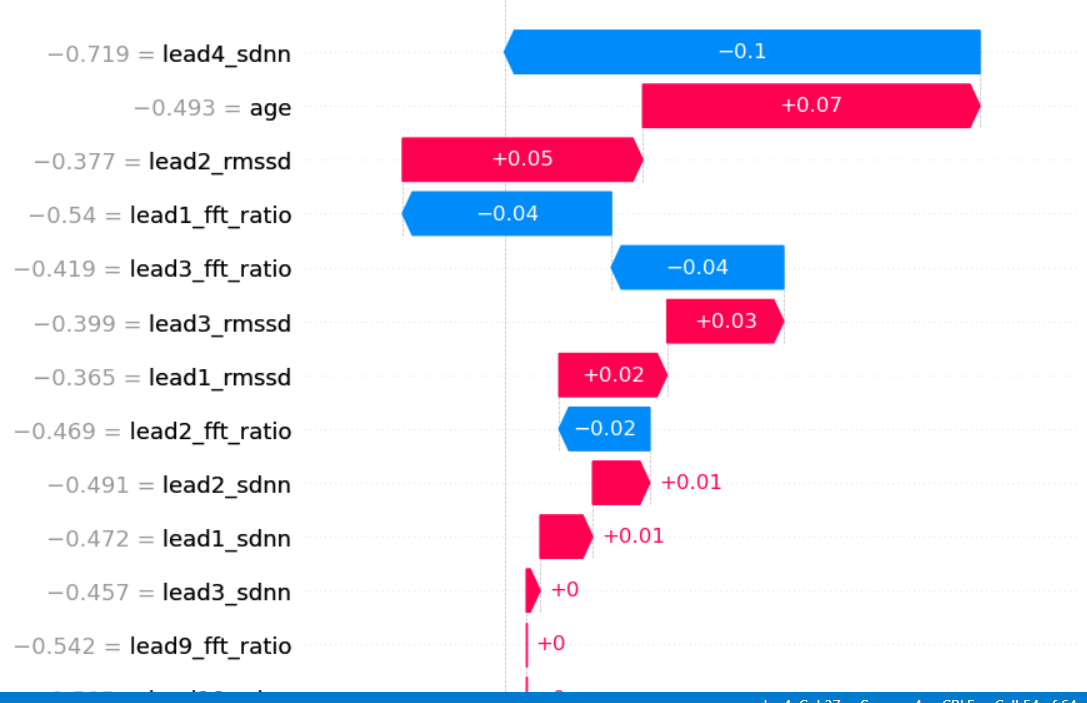

### Train 2

In [ ]:
settings_all_features = ExperimentSettings( 
    learning_rate=0.01,                   # Slower learning rate for stability
    number_epochs=100,                    # With early stopping to prevent overfitting
    batch_size=100,                       # Smaller batch size for better minority class learning
    classification_threshold=0.35,        # Adjust threshold for imbalanced data
    input_features=all_input_features,    # Use all HRV features
)

# Modify the following definition of METRICS to generate
# not only accuracy and precision, but also recall:
metrics = [
    keras.metrics.BinaryAccuracy(
        name='accuracy',
        threshold=settings_all_features.classification_threshold,
    ),
    keras.metrics.Precision(
        name='precision',
        thresholds=settings_all_features.classification_threshold,
    ),
    keras.metrics.Recall(
        name='recall', thresholds=settings_all_features.classification_threshold
    ),
    keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establish the model's topography.
model_all_features = create_model(settings_all_features, metrics)

# Train the model on the training set.
experiment_all_features = train_model(
    'all features',
    model_all_features,
    train_features,
    train_labels,
    settings_all_features,
)

# Plot metrics vs. epochs
plot_experiment_metrics(
    experiment_all_features, ['accuracy', 'precision', 'recall']
)
plot_experiment_metrics(experiment_all_features, ['auc'])

### Explainer

In [ ]:
model.summary()


In [101]:
norm_sample = normalized_dataset[normalized_dataset['Class'] == 'NORM'].sample(n=500, random_state=42)
lafb_sample = normalized_dataset[normalized_dataset['Class'] == 'LAFB'].sample(n=500, random_state=42)

X = pd.concat([norm_sample, lafb_sample])
X

,age,lead1_sdnn,lead1_rmssd,lead1_fft_ratio,lead2_sdnn,lead2_rmssd,lead2_fft_ratio,lead3_sdnn,lead3_rmssd,lead3_fft_ratio,...,lead10_fft_ratio,lead11_sdnn,lead11_rmssd,lead11_fft_ratio,lead12_sdnn,lead12_rmssd,lead12_fft_ratio,Class,sex,Class_Bool
24755,-0.304566,-0.209195,-0.026183,-1.083088,-0.221029,-0.042266,-1.106021,-0.331208,-0.233084,-1.021006,...,-1.111923,-0.196857,-0.010047,-1.121393,-0.194410,-0.005518,-1.127355,NORM,1,1
19452,-0.304566,1.885113,1.297339,-0.186534,1.940638,1.329310,-0.171094,0.886614,0.543932,-0.107230,...,-0.181408,1.948008,1.330612,-0.193791,1.947599,1.338075,-0.171789,NORM,1,1
11089,-0.643816,-0.226962,-0.213763,0.057899,-0.226485,-0.215945,0.078834,-0.318425,-0.331816,0.381138,...,0.141242,-0.223346,-0.213281,0.107687,-0.214136,-0.203331,0.008950,NORM,0,1
8180,0.487016,-0.682813,-0.550899,0.411208,-0.687962,-0.551248,0.745724,-0.598875,-0.524832,0.407351,...,-0.135220,-0.672757,-0.531928,0.635811,-0.668292,-0.534525,-0.131721,NORM,0,1
1572,-0.530733,-0.467947,-0.415185,0.011820,-0.475082,-0.434190,0.093430,-0.490009,-0.474614,0.246271,...,0.033390,-0.474865,-0.429576,0.164411,-0.473083,-0.431618,0.169877,NORM,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7786,0.882808,0.767251,1.260341,-0.997912,0.887740,1.417627,-1.016901,0.586623,0.972747,-0.969916,...,-1.016501,0.755004,1.246164,-1.026506,0.915633,1.454467,-1.036471,LAFB,1,0
8945,0.939349,-0.393178,-0.388099,-0.222954,-0.383856,-0.378590,-0.218073,-0.419864,-0.420897,0.129253,...,-0.302710,-0.375692,-0.364765,-0.327876,-0.376827,-0.367836,-0.285937,LAFB,0,0
20483,0.995891,-0.254105,-0.219653,1.002058,-0.255636,-0.221557,1.238162,-0.344921,-0.330020,1.647511,...,1.244573,-0.267068,-0.228551,1.137266,-0.264789,-0.227445,1.151379,LAFB,1,0
23475,0.487016,-0.629495,-0.513250,-0.302085,-0.598403,-0.421002,-0.369655,-0.580196,-0.507963,-0.675763,...,-0.223361,-0.613288,-0.473177,-0.959808,-0.557467,-0.364309,-1.076149,LAFB,0,0


In [102]:
import sklearn

import shap

# a classic housing price dataset
# X, y = shap.datasets.california(n_points=1000)
# normalized_dataset = normalized_dataset.drop(columns=['Class'])

X100 = shap.utils.sample(X, 1_000)  # 100 instances for use as the background distribution

# a simple linear model
# model = sklearn.linear_model.LinearRegression()
# model.fit(X, y)

In [103]:
X100.drop(columns=["Class"])
X100 = X100.apply(pd.to_numeric, errors='coerce')
X100

,age,lead1_sdnn,lead1_rmssd,lead1_fft_ratio,lead2_sdnn,lead2_rmssd,lead2_fft_ratio,lead3_sdnn,lead3_rmssd,lead3_fft_ratio,...,lead10_fft_ratio,lead11_sdnn,lead11_rmssd,lead11_fft_ratio,lead12_sdnn,lead12_rmssd,lead12_fft_ratio,Class,sex,Class_Bool
24755,-0.304566,-0.209195,-0.026183,-1.083088,-0.221029,-0.042266,-1.106021,-0.331208,-0.233084,-1.021006,...,-1.111923,-0.196857,-0.010047,-1.121393,-0.194410,-0.005518,-1.127355,NaN,1,1
19452,-0.304566,1.885113,1.297339,-0.186534,1.940638,1.329310,-0.171094,0.886614,0.543932,-0.107230,...,-0.181408,1.948008,1.330612,-0.193791,1.947599,1.338075,-0.171789,NaN,1,1
11089,-0.643816,-0.226962,-0.213763,0.057899,-0.226485,-0.215945,0.078834,-0.318425,-0.331816,0.381138,...,0.141242,-0.223346,-0.213281,0.107687,-0.214136,-0.203331,0.008950,NaN,0,1
8180,0.487016,-0.682813,-0.550899,0.411208,-0.687962,-0.551248,0.745724,-0.598875,-0.524832,0.407351,...,-0.135220,-0.672757,-0.531928,0.635811,-0.668292,-0.534525,-0.131721,NaN,0,1
1572,-0.530733,-0.467947,-0.415185,0.011820,-0.475082,-0.434190,0.093430,-0.490009,-0.474614,0.246271,...,0.033390,-0.474865,-0.429576,0.164411,-0.473083,-0.431618,0.169877,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7786,0.882808,0.767251,1.260341,-0.997912,0.887740,1.417627,-1.016901,0.586623,0.972747,-0.969916,...,-1.016501,0.755004,1.246164,-1.026506,0.915633,1.454467,-1.036471,NaN,1,0
8945,0.939349,-0.393178,-0.388099,-0.222954,-0.383856,-0.378590,-0.218073,-0.419864,-0.420897,0.129253,...,-0.302710,-0.375692,-0.364765,-0.327876,-0.376827,-0.367836,-0.285937,NaN,0,0
20483,0.995891,-0.254105,-0.219653,1.002058,-0.255636,-0.221557,1.238162,-0.344921,-0.330020,1.647511,...,1.244573,-0.267068,-0.228551,1.137266,-0.264789,-0.227445,1.151379,NaN,1,0
23475,0.487016,-0.629495,-0.513250,-0.302085,-0.598403,-0.421002,-0.369655,-0.580196,-0.507963,-0.675763,...,-0.223361,-0.613288,-0.473177,-0.959808,-0.557467,-0.364309,-1.076149,NaN,0,0


In [111]:
X100.columns

Index(['age', 'lead1_sdnn', 'lead1_rmssd', 'lead1_fft_ratio', 'lead2_sdnn',
       'lead2_rmssd', 'lead2_fft_ratio', 'lead3_sdnn', 'lead3_rmssd',
       'lead3_fft_ratio', 'lead4_sdnn', 'lead4_rmssd', 'lead4_fft_ratio',
       'lead5_sdnn', 'lead5_rmssd', 'lead5_fft_ratio', 'lead6_sdnn',
       'lead6_rmssd', 'lead6_fft_ratio', 'lead7_sdnn', 'lead7_rmssd',
       'lead7_fft_ratio', 'lead8_sdnn', 'lead8_rmssd', 'lead8_fft_ratio',
       'lead9_sdnn', 'lead9_rmssd', 'lead9_fft_ratio', 'lead10_sdnn',
       'lead10_rmssd', 'lead10_fft_ratio', 'lead11_sdnn', 'lead11_rmssd',
       'lead11_fft_ratio', 'lead12_sdnn', 'lead12_rmssd', 'lead12_fft_ratio',
       'Class', 'sex', 'Class_Bool'],
      dtype='object')

In [ ]:
# Assuming X is a pandas DataFrame
print("X shape:", X100.shape)  # Verify X has at least 11 features

# Slice the first 11 columns into separate inputs
inputs = [X100.iloc[:, i:i+1] for i in range(38)]  # Create a list of (n_samples, 1) DataFrames

# Pass these inputs to the model
preds = model.predict(inputs)
print("Predictions:", preds)



In [ ]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(lambda data: model.predict([data.iloc[:, i:i+1] for i in range(38)]), X100)
shap_values = explainer(X100)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "age",
    lambda data: model.predict([data.iloc[:, i:i+1] for i in range(38)]),
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

<Axes: xlabel='Class_Bool', ylabel='lead4_sdnn'>

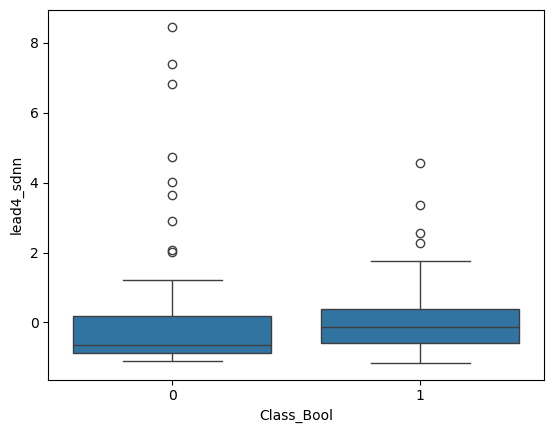

In [66]:
import seaborn as sns


sns.boxplot(data=X100, x='Class_Bool', y='lead4_sdnn')  # Replace 'label' with your target column


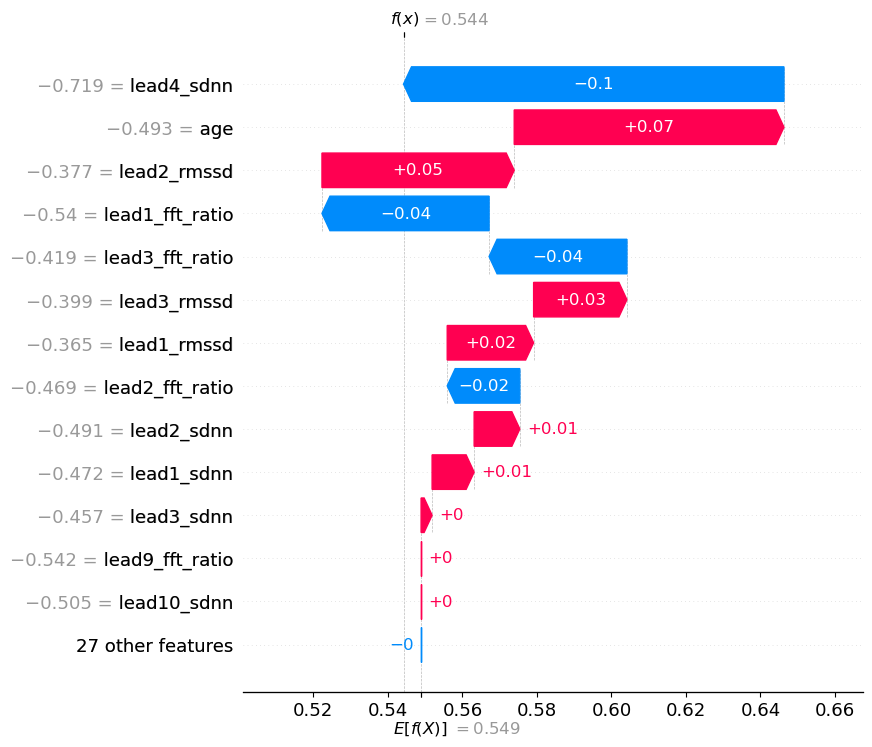

In [63]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

### Compare 2

In [38]:
test_metrics_all_features = evaluate_experiment(
    experiment_all_features, test_features, test_labels
)
compare_train_test(experiment_all_features, test_metrics_all_features)

Comparing metrics between train and test:
------
Train accuracy: 0.8234
Test accuracy:  0.8166
------
Train auc: 0.8276
Test auc:  0.8361
------
Train loss: 1.0324
Test loss:  0.5155
------
Train precision: 0.9008
Test precision:  0.8979
------
Train recall: 0.8844
Test recall:  0.8765


## Compare All

In [39]:
#@title Define function to compare experiments
from matplotlib.lines import Line2D

def compare_experiment(experiments: list[Experiment],
                       metrics_of_interest: list[str],
                       test_dataset: pd.DataFrame,
                       test_labels: np.array):
  # Make sure that we have all the data we need.
  for metric in metrics_of_interest:
    for experiment in experiments:
      if metric not in experiment.metrics_history:
        raise ValueError(f'Metric {metric} not available for experiment {experiment.name}')

  fig = plt.figure(figsize=(12, 12))
  ax = fig.add_subplot(2, 1, 1)

  colors = [f'C{i}' for i in range(len(experiments))]
  markers = ['.', '*', 'd', 's', 'p', 'x']
  marker_size = 10

  ax.set_title('Train metrics')
  for i, metric in enumerate(metrics_of_interest):
    for j, experiment in enumerate(experiments):
      plt.plot(experiment.epochs, experiment.metrics_history[metric], markevery=4,
               marker=markers[i], markersize=marker_size, color=colors[j])

  # Add custom legend to show what the colors and markers mean
  legend_handles = []
  for i, metric in enumerate(metrics_of_interest):
    legend_handles.append(Line2D([0], [0], label=metric, marker=markers[i],
                                 markersize=marker_size, c='k'))
  for i, experiment in enumerate(experiments):
    legend_handles.append(Line2D([0], [0], label=experiment.name, color=colors[i]))

  ax.set_xlabel("Epoch")
  ax.set_ylabel("Metric value")
  ax.grid()
  ax.legend(handles=legend_handles)

  ax = fig.add_subplot(2, 1, 2)
  spacing = 0.3
  n_bars = len(experiments)
  bar_width = (1 - spacing)/n_bars
  for i, experiment in enumerate(experiments):
    test_metrics = evaluate_experiment(experiment, test_dataset, test_labels)
    x = np.arange(len(metrics_of_interest)) + bar_width * (i + 1/2 - n_bars/2)
    ax.bar(x, [test_metrics[metric] for metric in metrics_of_interest], width=bar_width, label=experiment.name)
  ax.set_xticks(np.arange(len(metrics_of_interest)), metrics_of_interest)

  ax.set_title('Test metrics')
  ax.set_ylabel('Metric value')
  ax.set_axisbelow(True) # Put the grid behind the bars
  ax.grid()
  ax.legend()

print('Defined function to compare experiments.')

Defined function to compare experiments.


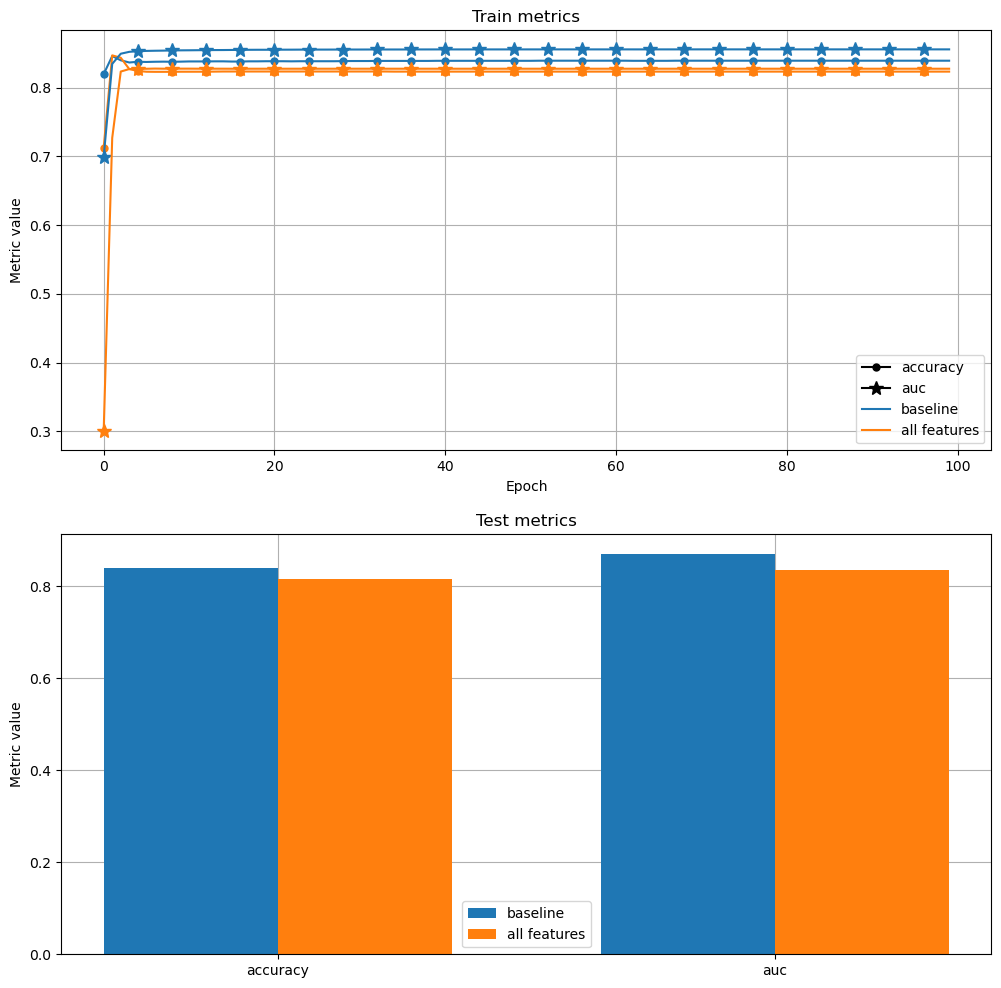

In [40]:
compare_experiment([experiment, experiment_all_features],
                   ['accuracy', 'auc'],
                   test_features, test_labels)